# Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from scipy.stats import norm


# 1. Read Dataset
### 1.1 Load the dataset (e.g., using pandas.read_csv()).

In [2]:
df = pd.read_csv('Datasets/Insurance.csv')

### 1.2 Inspect the data structure (.head(), .info(), .describe()).

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 2. Explore the Data
## 2.1 Basic Exploration:
### 2.1.1 Print the first few rows to understand the structure of the dataset.

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2.2 Check Datatypes:
### 2.2.1 Identify numerical and categorical columns.

In [7]:
numericalColumns = df.select_dtypes(include=['number']).columns
categoricalColumns = df.select_dtypes(include=['object']).columns

In [8]:
numericalColumns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
categoricalColumns

Index(['sex', 'smoker', 'region'], dtype='object')

### 2.2.2 Convert categorical columns to the category datatype for better memory efficiency.

In [10]:
df[categoricalColumns] = df[categoricalColumns].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## 2.3 Categorical Column Analysis:
### 2.3.1 Display the number of unique categories in each categorical column.

In [11]:
categoricalColumns = df.select_dtypes(include=['category']).columns
df[categoricalColumns].nunique()

sex       2
smoker    2
region    4
dtype: int64

## 2.4 Missing Values:
### 2.4.1 Check for missing values in each column.

In [12]:
missingValues = df.isnull().sum()
missingValues

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2.4.2 Calculate the percentage of missing values.

In [13]:
missingPercentage = (missingValues / len(df)) * 100
missingPercentage

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [14]:
pd.DataFrame(data=[missingValues, missingPercentage], index=['Missing Values', 'Missing Percentage'])

,age,sex,bmi,children,smoker,region,charges
Missing Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Handle Missing Values
## 3.1 High Null Ratios:
### 3.1.1 Drop columns where the null-value percentage is too high (e.g., >50%).

In [15]:
columnsToDrop = missingPercentage[missingPercentage > 50].index
df.drop(columns=columnsToDrop, inplace=True)

## 3.2 Categorical Columns:
### 3.2.1 Fill missing values with the mode of the column.

In [16]:
categoricalColumns = df.select_dtypes(include=['category']).columns
for column in categoricalColumns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

### 3.2.2 Visualize the distribution of each column.

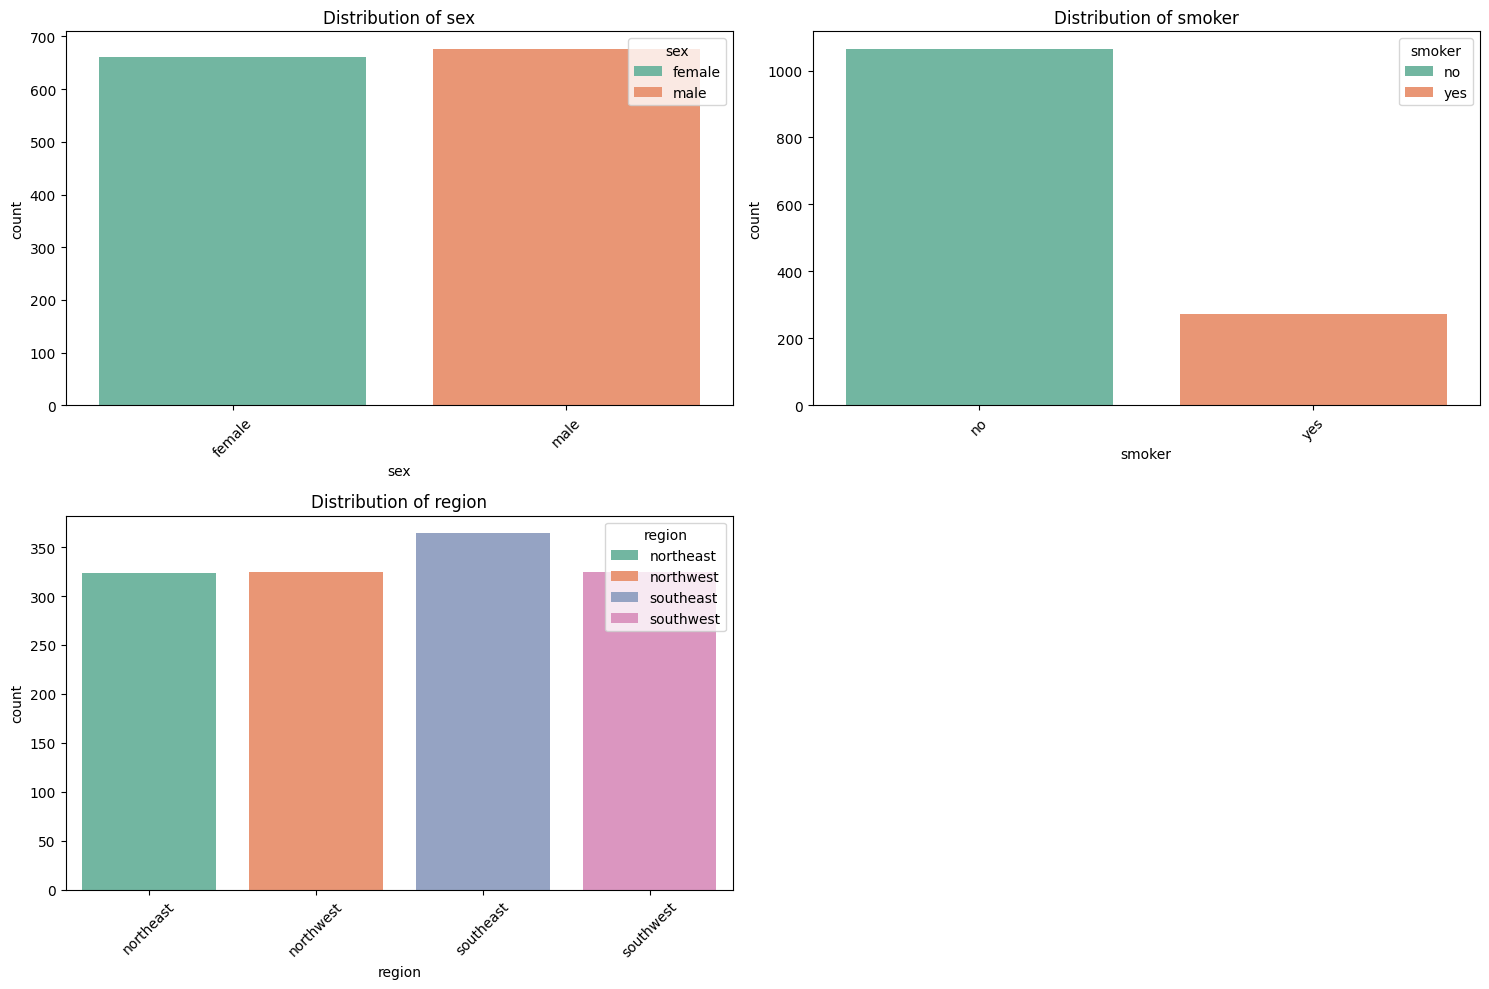

In [17]:
plt.figure(figsize=(15, 10))
for index, column in enumerate(categoricalColumns):
    plt.subplot((len(categoricalColumns) + 1) // 2, 2, index + 1)
    sns.countplot(data=df, x=column, hue=column, legend=True, palette="Set2")
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3.3 Numerical Columns:
### 3.3.1 Visualize the distribution of each column (e.g., using histograms or skewness statistics).

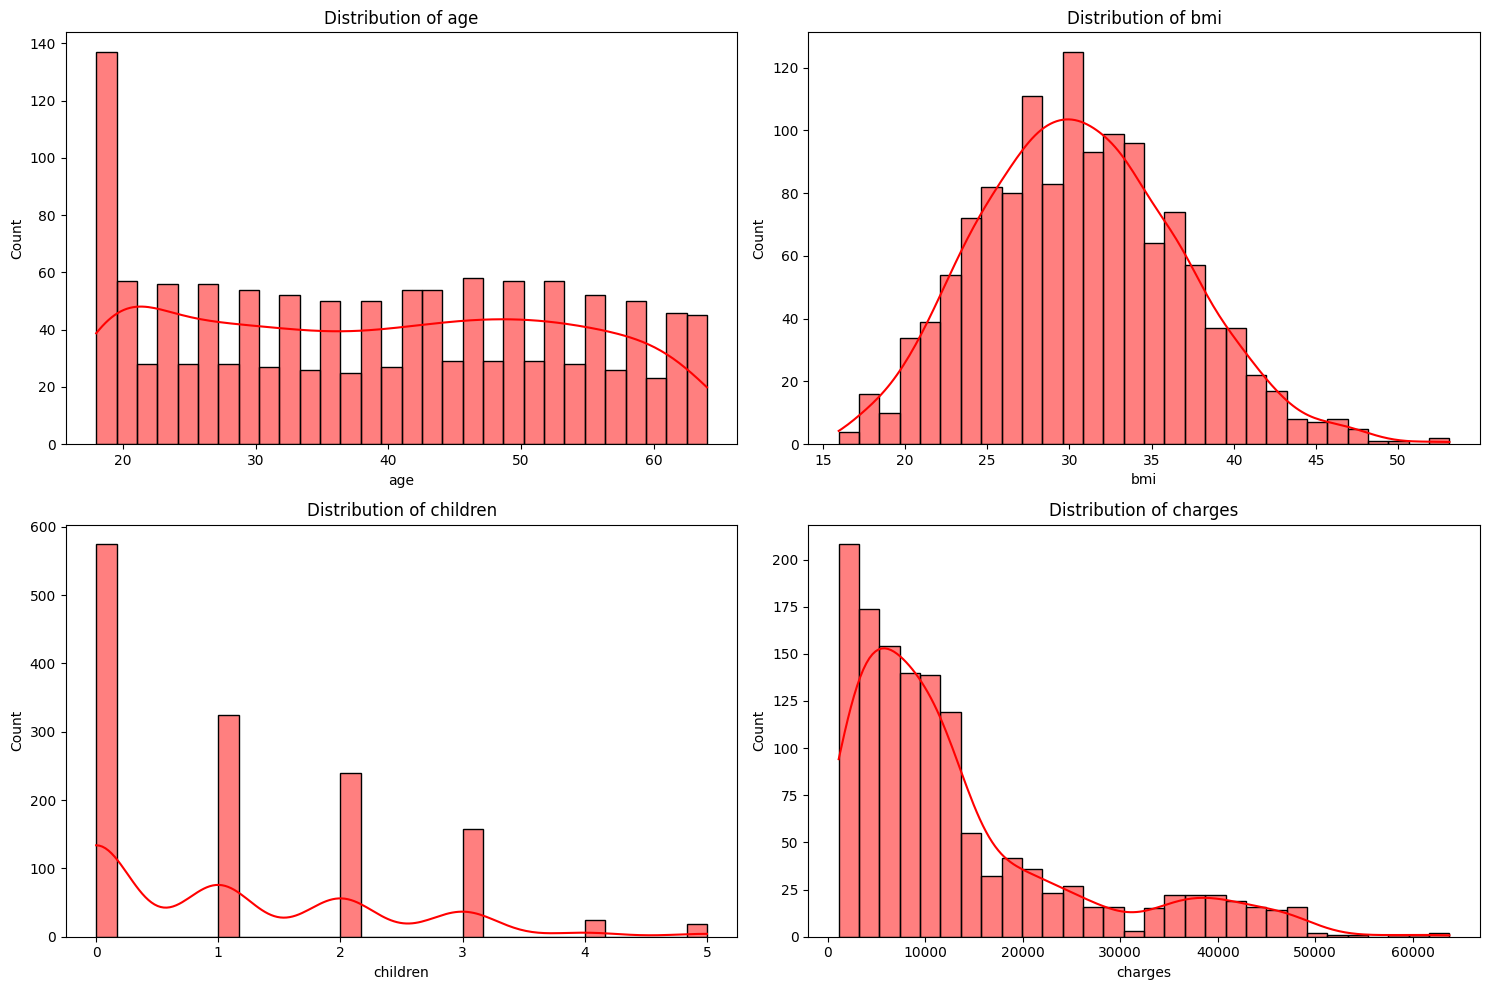

In [18]:
plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 1) // 2, 2, index + 1)
    sns.histplot(df[column], kde=True, bins=30, color='red')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### 3.3.2 If skewed, fill missing values with the median to reduce the effect of outliers. For symmetric distributions, use the mean for imputation.

In [19]:
for column in numericalColumns:
    if df[column].isnull().sum() > 0:
        skewness = df[column].skew() # There are multiple ways to calculate skewness, but the most common formula is based on the Pearson moment coefficient of skewness.
        if skewness > 1: # Skewed distribution.
            df.fillna({column: df[column].median()}, inplace=True)
        else:
            df.fillna({column: df[column].mean()}, inplace=True)

## 3.4. Validate Null Handling:
### 3.4.1 Recheck the dataset to ensure no missing values remain.

In [20]:
assert df.isnull().sum().sum() == 0

# 4. Outlier Detection and Treatment
## 4.1 Visualize Outliers:
### 4.1.1 Use box plots to detect outliers in numerical columns.

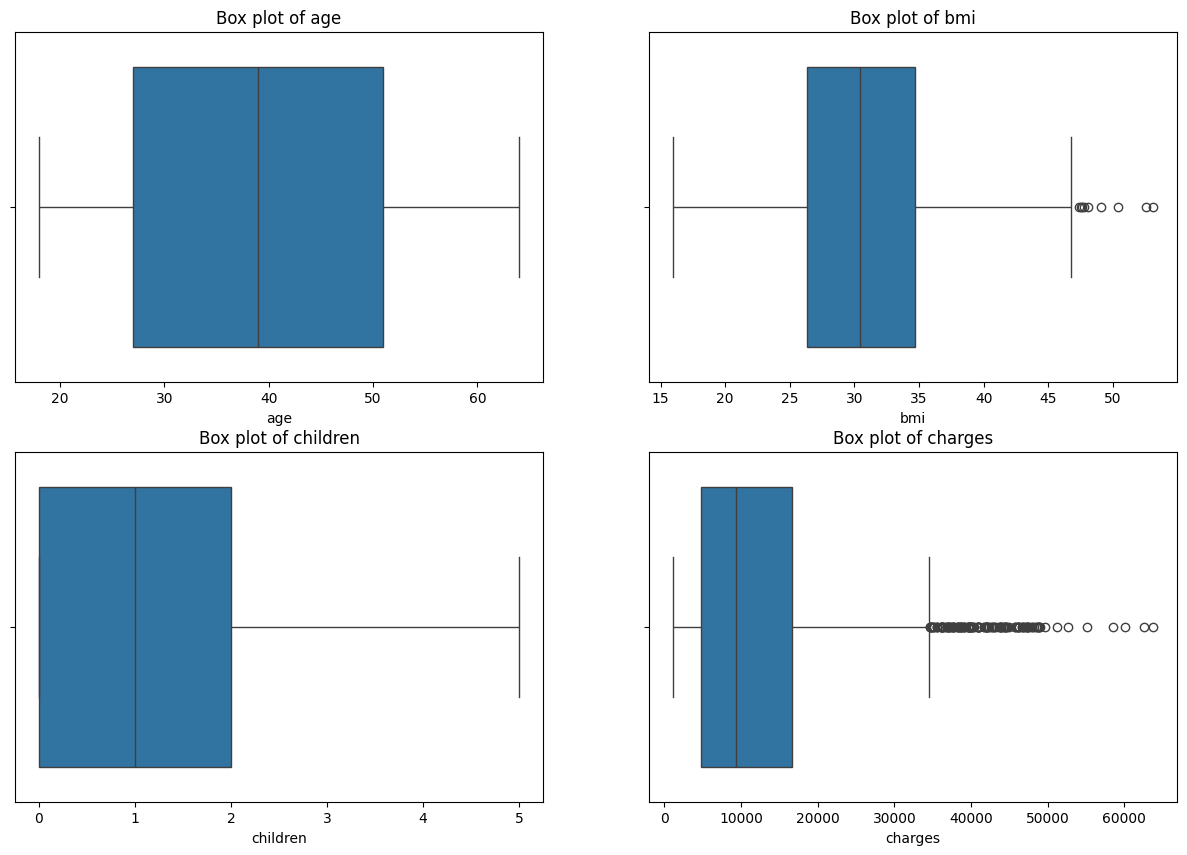

In [21]:
numericalColumns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 1) // 2, 2, index + 1)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
plt.show()

## 4.2 Capping Outliers:
### 4.2.1 Replace values above the upper whisker with the maximum non-outlier value (upper bound).
### 4.2.2 Replace values below the lower whisker with the minimum non-outlier value (lower bound).

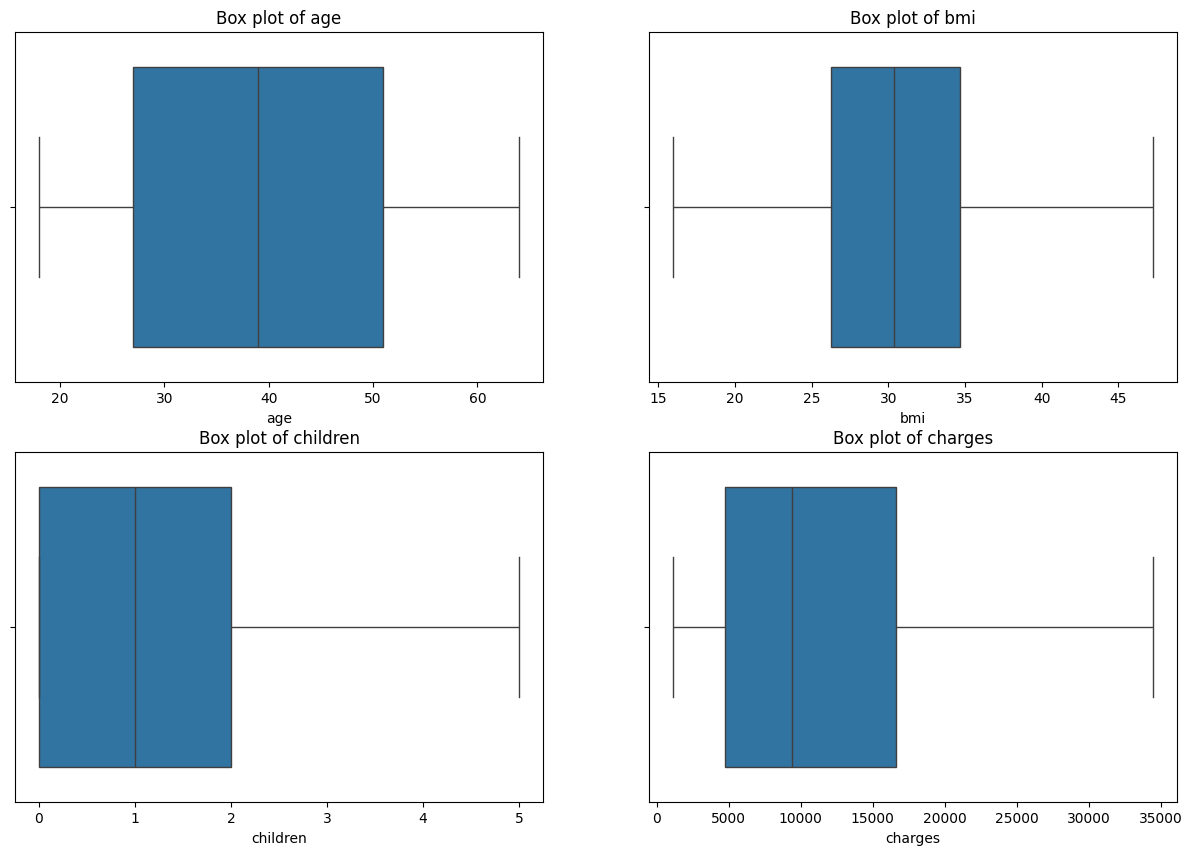

In [22]:
def func(x):
    if x < lowerBound:
        return lowerBound
    if x > upperBound:
        return upperBound
    return x

numericalColumns = df.select_dtypes(include=['number']).columns
for column in numericalColumns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(func=func)

plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 1) // 2, 2, index + 1)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
plt.show()

## 4.3 Categorical Outliers:
### 4.3.1 For rare categories (low frequency), replace them with the mode of the column.

In [23]:
categoricalColumns = df.select_dtypes(include=['category']).columns
for column in categoricalColumns:
    ## Returns a Series whose index is the unique values of that column.
    ## The corresponding values are the frequency of each value normalized.
    mode = df[column].mode()[0]
    fp = df[column].value_counts(normalize=True) ## Frequency percentage.
    rareCategories = fp[fp < 0.05].index ## Extracts the values with low frequency percentage.
    df[column] = df[column].apply(
        func=lambda x: mode if x in rareCategories else x
    )
df[categoricalColumns] = df[categoricalColumns].astype('category')

# 5. Check for Duplicates

In [24]:
# df.drop_duplicates(inplace=True)
# df.index = np.arange(0, len(df))

# 6. Drop Low-Variance Columns

The variance for each column in a DataFrame is calculated using the **formula for variance**:


$\text{Variance} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

Where:
- $n$ is the number of elements in the column.
- $x_i$ are the individual data points in the column.
- $\bar{x}$ is the mean (average) of the column.

Variance measures the spread or dispersion of data points around the mean in a dataset. It provides insights into the variability of the data:
- High variance indicates that data points are spread out widely from the mean.
- Low variance indicates that data points are clustered closely around the mean.

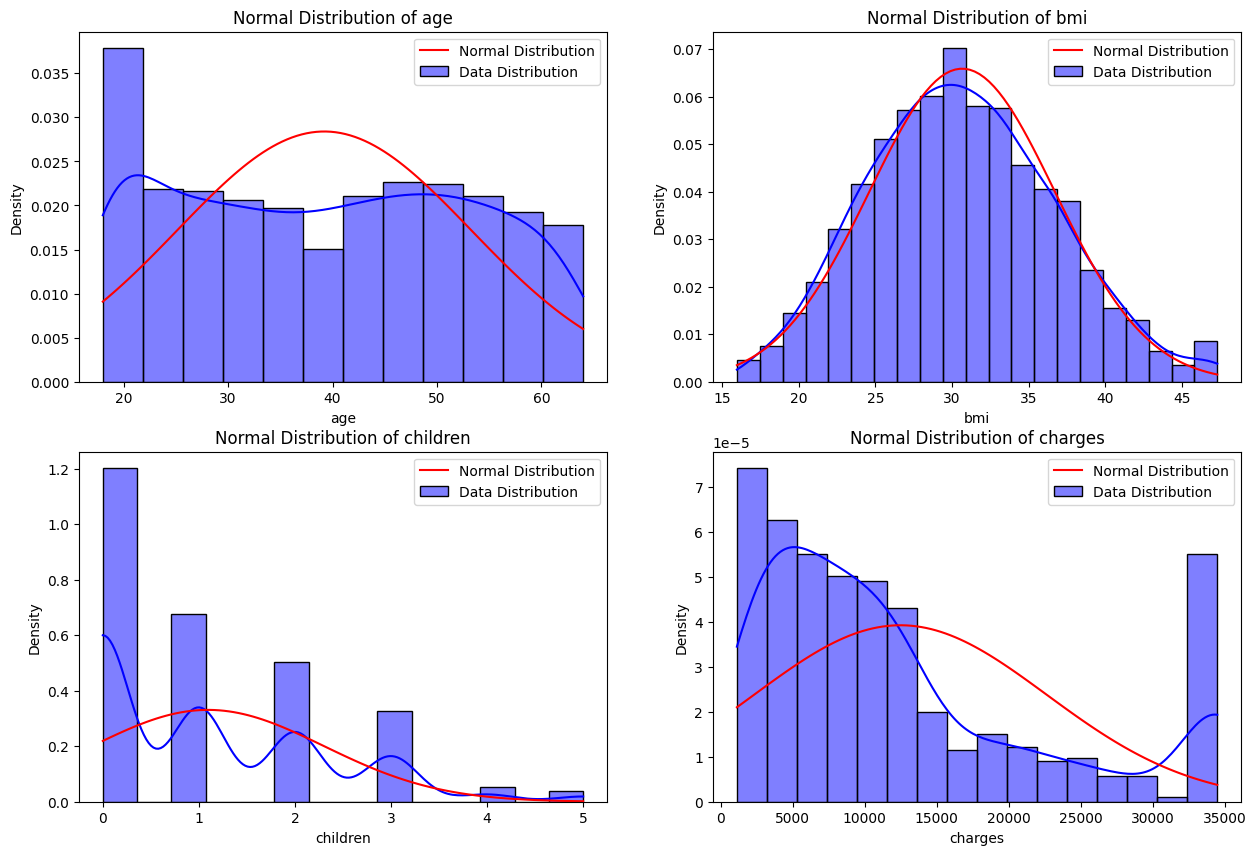

In [25]:
numericalColumns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(numericalColumns):
    plt.subplot((len(numericalColumns) + 1) // 2, 2, index + 1)
    sns.histplot(df[column], kde=True, stat="density", color="blue", label="Data Distribution")
    mean = df[column].mean()
    std = df[column].std()
    x = np.linspace(df[column].min(), df[column].max(), 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, color='red', label='Normal Distribution')
    plt.title(f'Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
plt.show()

In [26]:
df[numericalColumns].var()

age         1.974014e+02
bmi         3.668635e+01
children    1.453213e+00
charges     1.031861e+08
dtype: float64

In [27]:
THRESHOLD = 0.01
variance = df[numericalColumns].var()
df.drop(columns=variance[variance < THRESHOLD].index, inplace=True)
numericalColumns = df.select_dtypes(include=['number']).columns
df[numericalColumns].var()

age         1.974014e+02
bmi         3.668635e+01
children    1.453213e+00
charges     1.031861e+08
dtype: float64

# 7. Feature and Label Separation

In [28]:
TARGET_COLUMN = 'charges'
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

In [29]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [30]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# 8. Encoding Categorical Columns
We are going to use three types of encoding techniques:
1. Label encoding
2. One-hot encoding
3. Binary encoding

## Label Encoding
Label encoding is a technique used to convert categorical data into numerical form by assigning a unique integer to each category. It is useful for handling categorical variables that have ordinal or nominal data types.


Label Encoding
What is it? Label encoding is a technique used to convert categorical data into numerical form by assigning a unique integer to each category. It is useful for handling categorical variables that have ordinal or nominal data types.

### Advantages
- Simple and Memory Efficient.
- Preserves Data Shape.

### Disadvantages
- Imposes Ordinality.
- Less Effective for Machine Learning Algorithms.

## One-Hot Encoding
One-hot encoding is a technique to represent categorical data by creating new binary columns for each unique category. Each column represents a category, and for a given row, the value is 1 for the column corresponding to the category and 0 for all other columns.

### Advantages:
- No assumption of ordinal relationships between categories.
- Simple and interpretable.

### Disadvantages:
- Increases the number of features, especially for high-cardinality columns (many unique categories), which can lead to sparsity (many 0s) and high memory usage.
- Inefficient for machine learning algorithms sensitive to high-dimensional data.

## Binary Encoding
Binary encoding combines the benefits of one-hot encoding and label encoding. It represents categories as binary digits, reducing dimensionality compared to one-hot encoding.
- Each category is first assigned a unique integer (as in label encoding).
- The integer is then converted into binary.
- Each binary digit becomes a separate column.

### Advantages:
- Reduces dimensionality compared to one-hot encoding.
- More memory-efficient for high-cardinality columns.
### Disadvantages:
- Introduces a slight ordinal relationship between categories because of the integer-to-binary mapping.

In [31]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(X[categoricalColumns])
X_t = pd.DataFrame(data=encoded, columns=encoder.get_feature_names_out(categoricalColumns))
X_t

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X = pd.concat([X, X_t], axis=1)
X.drop(columns=categoricalColumns, inplace=True)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Model Selection

# 1. Read the data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

1070 1070
268 268


# 2. Train the Model

In [35]:
scaler = StandardScaler()
numericalColumns = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numericalColumns] = scaler.fit_transform(X_train[numericalColumns])
X_test[numericalColumns] = scaler.fit_transform(X_test[numericalColumns])

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 3. Evaluate the Model

In [37]:
y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
mse

21932743.477922402

In [40]:
mae

3019.6378206578593

In [41]:
rmse

4683.240702539471

In [42]:
r2

0.7939135605403079